In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             roc_auc_score, confusion_matrix, classification_report,
                             roc_curve, f1_score, mean_squared_error)
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler

# Importing the three datasets and create a new dataset

In [2]:
ratings_df = pd.read_csv("C:\\Users\\Shawn Eng\\Desktop\\ratings.dat", delimiter="::", header=None, engine='python', encoding='ISO-8859-1')
users_df = pd.read_csv("C:\\Users\\Shawn Eng\\Desktop\\users.dat", delimiter="::", header=None, engine='python', encoding='ISO-8859-1')
movies_df = pd.read_csv("C:\\Users\\Shawn Eng\\Desktop\\movies.dat", delimiter="::", header=None, engine='python', encoding='ISO-8859-1')
                     
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users_df.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movies_df.columns = ['MovieID', 'Title', 'Genres']

Master_Data = pd.merge(ratings_df, users_df, on='UserID')
Master_Data = pd.merge(Master_Data, movies_df, on='MovieID')

#Read the new dataset df_Master_Data
df_Master_Data = pd.DataFrame(Master_Data)
df_Master_Data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [3]:
df_Master_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [4]:
df_Master_Data.describe().round(3)


,UserID,MovieID,Rating,Timestamp,Age,Occupation
count,1000209.000,1000209.000,1000209.000,1.000209e+06,1000209.000,1000209.000
mean,3024.512,1865.540,3.582,9.722437e+08,29.738,8.036
std,1728.413,1096.041,1.117,1.215256e+07,11.752,6.531
min,1.000,1.000,1.000,9.567039e+08,1.000,0.000
25%,1506.000,1030.000,3.000,9.653026e+08,25.000,2.000
50%,3070.000,1835.000,4.000,9.730180e+08,25.000,7.000
75%,4476.000,2770.000,4.000,9.752209e+08,35.000,14.000
max,6040.000,3952.000,5.000,1.046455e+09,56.000,20.000


In [5]:
df_Master_Data.shape

(1000209, 10)

<Axes: >

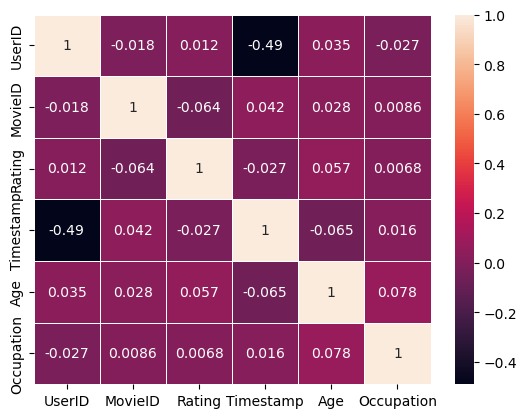

In [6]:
corr= df_Master_Data.corr()
sns.heatmap(corr, annot= True, linewidths=0.5)

In [7]:
# checking for NA Values in the DataFrame
print('NA Values in the Data Frame is : ')
def is_na(x):
    for i in x.columns:
        print(i,'column',' :', x[i].isna().sum(),'\n')
is_na(df_Master_Data)

NA Values in the Data Frame is : 
UserID column  : 0 

MovieID column  : 0 

Rating column  : 0 

Timestamp column  : 0 

Gender column  : 0 

Age column  : 0 

Occupation column  : 0 

Zip-code column  : 0 

Title column  : 0 

Genres column  : 0 



In [8]:
df_Master_Data.isna().value_counts()

UserID  MovieID  Rating  Timestamp  Gender  Age    Occupation  Zip-code  Title  Genres
False   False    False   False      False   False  False       False     False  False     1000209
dtype: int64

# Exploring the Datasets using Visual Representations

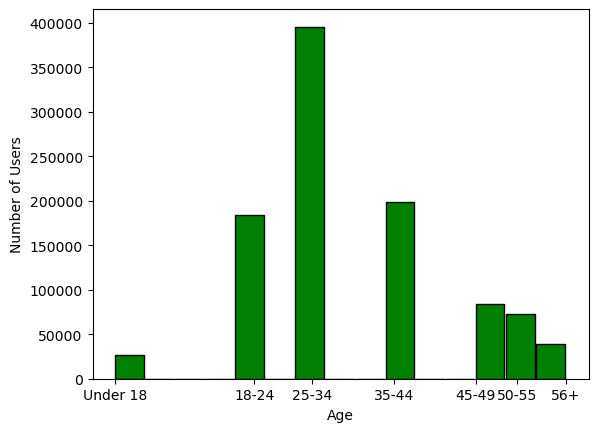

In [9]:
# User Age Distribution of Master_Data

plt.hist(df_Master_Data['Age'], bins=15, width=3.5, edgecolor='k', color='green')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks([1, 18, 25, 35, 45, 50, 56], ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+'])
plt.show()

## The user age distribution approximates a normal distribution curve with vast majority of the users in the dataset being in 
## their prime where they have the most time freedom and disposable income to watch movies as they are not yet responsible for
## paying house expenses or major responsibilities to shoulder. Vast Majority of MovieLens Users are younger as they are
## technologically savvy and able to naviagte MovieLens much easier than elders / seniors. People in elder years tend to
## rewatch older movies that were popular in their youth and early adult years that can be watched for free on television.

In [10]:
#User rating of the movie “Toy Story”
user_rating = ratings_df.groupby('UserID').size()
user_rating = df_Master_Data[df_Master_Data.Title == "Toy Story (1995)"]

user_rating

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6,1,4,978237008,F,50,9,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8,1,4,978233496,M,25,12,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9,1,5,978225952,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10,1,5,978226474,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
43698,6022,1,5,956755763,M,25,17,57006,Toy Story (1995),Animation|Children's|Comedy
43699,6025,1,5,956812867,F,25,1,32607,Toy Story (1995),Animation|Children's|Comedy
43700,6032,1,4,956718127,M,45,7,55108,Toy Story (1995),Animation|Children's|Comedy
43701,6035,1,4,956712849,F,25,1,78734,Toy Story (1995),Animation|Children's|Comedy


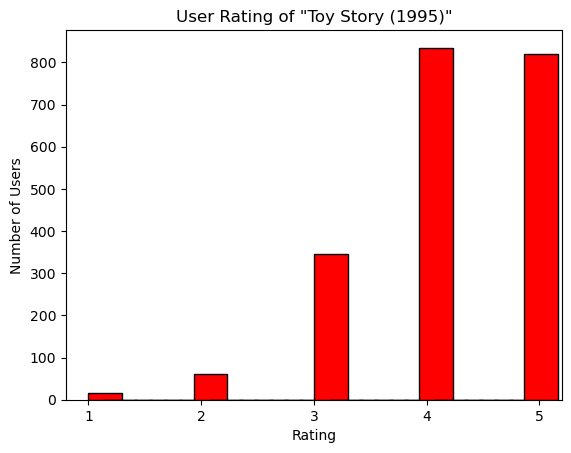

In [11]:
# User rating of the movie "Toy Story":
Toy_Story_Ratings = df_Master_Data[df_Master_Data['Title'] == 'Toy Story (1995)']['Rating']
plt.hist(Toy_Story_Ratings, bins=30, width=0.3, edgecolor='k', color='red')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('User Rating of "Toy Story (1995)"')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

## Toy Story was the first computer-animated feature film when it was released in 1995. The graphics of the film was cutting-edge
## for its time which convinced many children & teenagers to watch it and its excellent storyline pulled in even adults
## as the film allows them to indulge in nostaligia of their childhood days playing with toys that their parents bought for them 
## This led to near universal acclaim and high ratings from critics & audiences for the film. The user ratings of the film toy 
## story are heavily left-skewed as a result. This was the first of many movies to made by Pixar that accurately captures the
## inner pains and joys of growing up which made subsequent movies very popular and perform very well in cinemas to the present
## day.

In [12]:
movie_rating=ratings_df.groupby(['MovieID'])
avg_movie_rating=movie_rating.agg({'Rating':'mean'})
Top_25_movies=avg_movie_rating.sort_values('Rating',ascending=False).head(25)

pd.merge(Top_25_movies, movies_df, how='left', left_on=['MovieID'], right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


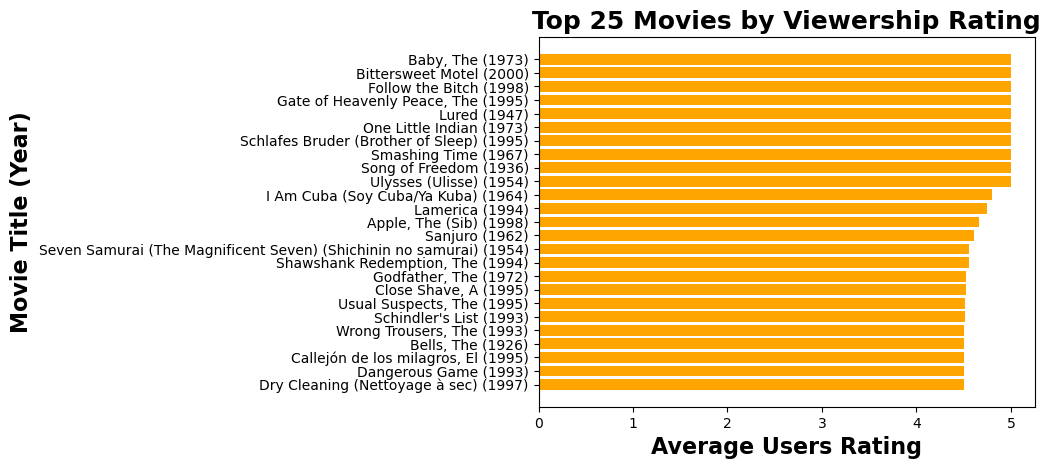

In [13]:
# Top 25 movies by viewership rating:

Top_25_Movies = df_Master_Data.groupby('Title')['Rating'].mean().nlargest(25).sort_values(ascending=False)
plt.barh(Top_25_Movies.index, Top_25_Movies.values, color='orange')
plt.xlabel('Average Users Rating', fontweight='bold', fontsize=16)
plt.ylabel('Movie Title (Year)', fontweight='bold', fontsize=16)
plt.title('Top 25 Movies by Viewership Rating', fontweight='bold', fontsize=18)
plt.gca().invert_yaxis()
plt.show()

## The majority of the Top 25 movies by viewership rating in this Dataset can be clearly seen to be made in the 1990s 
## with only 1 movie in this list coming out in then year 2000. This can be primarily attributed to the 18 years old to 44 years
## old age bracket forming vast majority of users as they are technologically savvy and able to interact with Movielens easily
##  which will be an issue for those in their 50s and above. With 11 of the Top 25 movies made in the 1920s to 1970s, it can be 
## clearly seen that MovieLens users in their 40s and 50s ae very actively giving high ratings to old movies that were popular
## when they were young. This might indicate that younger users as a whole are less likely to post reviews or give higher 
##ratings to movies.

In [14]:
# The ratings for all the movies reviewed by for a particular user with the User ID of 2696

In [15]:
data_of_User_2696 = df_Master_Data[df_Master_Data['UserID']==2696]

In [16]:
data_of_User_2696.count()

UserID        20
MovieID       20
Rating        20
Timestamp     20
Gender        20
Age           20
Occupation    20
Zip-code      20
Title         20
Genres        20
dtype: int64

In [17]:
#Plot the table with index title
plot_for_User_2696 = data_of_User_2696.pivot_table('Rating', index='Title')

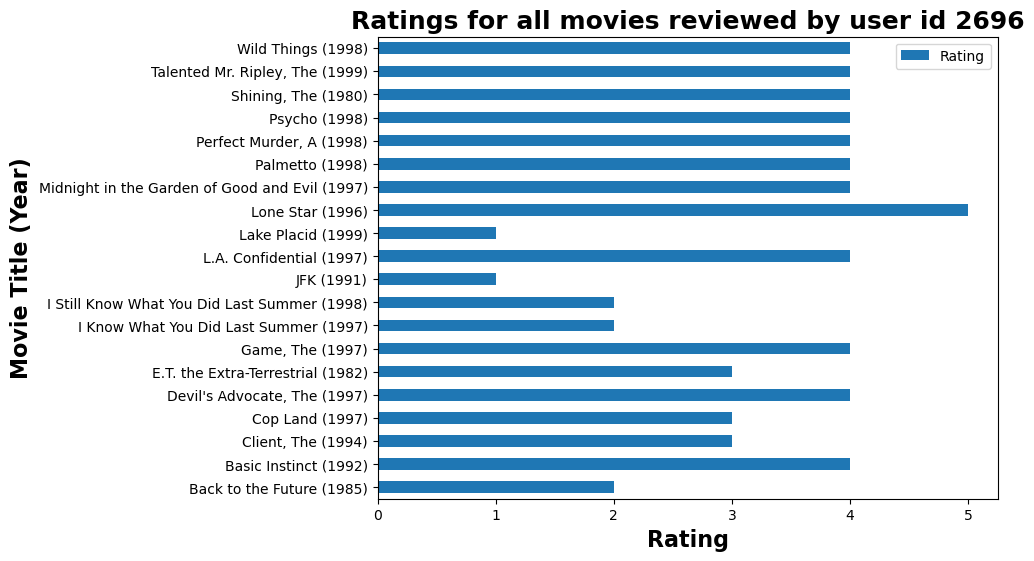

In [18]:
#Plot rating data by User ID 2696

plot_for_User_2696.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Rating', fontweight='bold', fontsize=16)
plt.ylabel('Movie Title (Year)', fontweight='bold', fontsize=16)
plt.title('Ratings for all movies reviewed by user id 2696', fontweight='bold', fontsize=18)
plt.show()

## There is a high probability that UserID 2696 is in his/her 20s to 30s at that point in time as all the movies reviewed by
## this person came out in the 1980s and 1990s which are highly likely to be popular with younger people. UserID has strong 
## interest in Science Fiction, Crime, Action, Mystery and Horror Films as he/she gave good ratings to such films. 

In [19]:
# Find ratings for all movies reviewed by a particular user (user id = 2696):

User_2696_Ratings = df_Master_Data[df_Master_Data['UserID'] == 2696][['UserID', 'MovieID', 'Title', 'Rating']].sort_values('Rating', ascending=False)
User_2696_Ratings

,UserID,MovieID,Title,Rating
250014,2696,800,Lone Star (1996),5
609204,2696,1625,"Game, The (1997)",4
612552,2696,1645,"Devil's Advocate, The (1997)",4
244232,2696,1617,L.A. Confidential (1997),4
689379,2696,1258,"Shining, The (1980)",4
277808,2696,3176,"Talented Mr. Ripley, The (1999)",4
371178,2696,1711,Midnight in the Garden of Good and Evil (1997),4
618708,2696,1092,Basic Instinct (1992),4
598042,2696,1783,Palmetto (1998),4
603189,2696,1892,"Perfect Murder, A (1998)",4


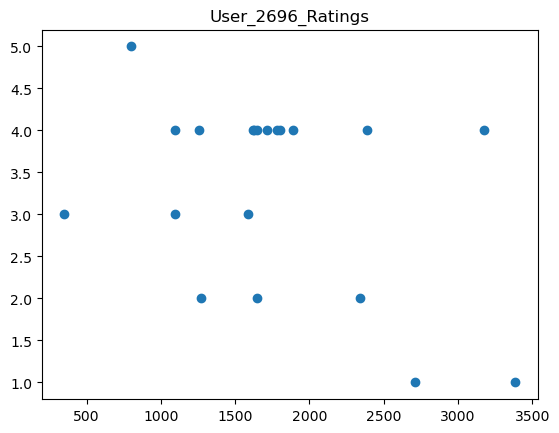

In [20]:
plt.scatter(x=User_2696_Ratings['MovieID'],y=User_2696_Ratings['Rating'])
plt.title('User_2696_Ratings')
plt.show()

In [21]:
Genres_List = df_Master_Data.Genres.tolist()
genre_list = []
i = 0
while (i<len(Genres_List)):
    genre_list+= Genres_List[i].split('|')
    i+=1

In [22]:
# Find out all the unique genres:
Unique_Genres = list(set(genre_list))
print(Unique_Genres)
print()
print("Number of the Unique Genres : ", len(Unique_Genres))

['Thriller', 'Action', 'Sci-Fi', 'Animation', 'Fantasy', 'Western', 'Horror', 'War', 'Musical', 'Crime', 'Romance', 'Comedy', 'Film-Noir', 'Adventure', 'Mystery', 'Drama', "Children's", 'Documentary']

Number of the Unique Genres :  18


In [23]:
# 'Gender' - Label encoding
df_Master_Data.Gender.value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [24]:
# Gender Label Encode

Gender_Dict = {'F': 0 , 'M': 1}
df_Master_Data['Gender']= df_Master_Data['Gender'].map(Gender_Dict)
df_Master_Data.Gender.value_counts()

1    753769
0    246440
Name: Gender, dtype: int64

# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre

In [25]:
New_Data = pd.concat([df_Master_Data,df_Master_Data.Genres.str.get_dummies()], axis=1)
print(New_Data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [26]:
New_Data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,0,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,978298413,1,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,978220179,1,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,978199279,1,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,978158471,1,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_Master_Data_New = New_Data.drop(['Timestamp', 'Zip-code', 'Title', 'Genres'],  axis=1)
df_Master_Data_New

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,0,1,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,1,56,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,1,25,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,1,25,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,1,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,1,18,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,3,1,35,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,1,18,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,5,0,18,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
print(df_Master_Data_New.columns)

Index(['UserID', 'MovieID', 'Rating', 'Gender', 'Age', 'Occupation', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [29]:
df_Master_Data_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 24 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   UserID       1000209 non-null  int64
 1   MovieID      1000209 non-null  int64
 2   Rating       1000209 non-null  int64
 3   Gender       1000209 non-null  int64
 4   Age          1000209 non-null  int64
 5   Occupation   1000209 non-null  int64
 6   Action       1000209 non-null  int64
 7   Adventure    1000209 non-null  int64
 8   Animation    1000209 non-null  int64
 9   Children's   1000209 non-null  int64
 10  Comedy       1000209 non-null  int64
 11  Crime        1000209 non-null  int64
 12  Documentary  1000209 non-null  int64
 13  Drama        1000209 non-null  int64
 14  Fantasy      1000209 non-null  int64
 15  Film-Noir    1000209 non-null  int64
 16  Horror       1000209 non-null  int64
 17  Musical      1000209 non-null  int64
 18  Mystery      1000209 non-null  int64
 19  

# Determine the features affecting the ratings of any particular movie.


In [30]:
#correlation 
df_Master_Data_New.corr()

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,1.000000,-0.017739,0.012303,-0.035042,0.034688,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,...,0.002212,0.004701,-0.001392,-0.000222,0.004334,0.006834,-0.003283,-0.001107,0.003502,0.004114
MovieID,-0.017739,1.000000,-0.064042,0.021626,0.027575,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,...,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940
Rating,0.012303,-0.064042,1.000000,-0.019861,0.056869,0.006753,-0.047633,-0.036718,0.019670,-0.039829,...,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311
Gender,-0.035042,0.021626,-0.019861,1.000000,-0.003189,0.114974,0.094380,0.038645,-0.017719,-0.031662,...,0.002806,0.005152,0.036566,-0.038051,-0.000905,-0.091272,0.072372,0.038039,0.025636,0.026397
Age,0.034688,0.027575,0.056869,-0.003189,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,...,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177
Occupation,-0.026698,0.008585,0.006753,0.114974,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,...,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924
Action,-0.002023,-0.042046,-0.047633,0.094380,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,...,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242
Adventure,-0.000683,-0.082413,-0.036718,0.038645,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,...,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964
Animation,-0.007665,-0.014177,0.019670,-0.017719,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,...,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
Children's,-0.004862,-0.071589,-0.039829,-0.031662,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,...,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269


In [31]:
# Calculate the correlation matrix
Correl_Matrix = df_Master_Data_New.corr(numeric_only=True)

# Display the correlation matrix with respect to the 'Rating' column
Correl_Matrix['Rating'].sort_values(ascending=False)

Rating         1.000000
Drama          0.122561
War            0.075688
Film-Noir      0.060259
Age            0.056869
Crime          0.033446
Documentary    0.028098
Animation      0.019670
Mystery        0.015848
Musical        0.015643
UserID         0.012303
Romance        0.009644
Western        0.007311
Occupation     0.006753
Thriller      -0.004806
Gender        -0.019861
Fantasy       -0.023312
Adventure     -0.036718
Comedy        -0.039622
Children's    -0.039829
Sci-Fi        -0.044487
Action        -0.047633
MovieID       -0.064042
Horror        -0.094353
Name: Rating, dtype: float64

<Axes: >

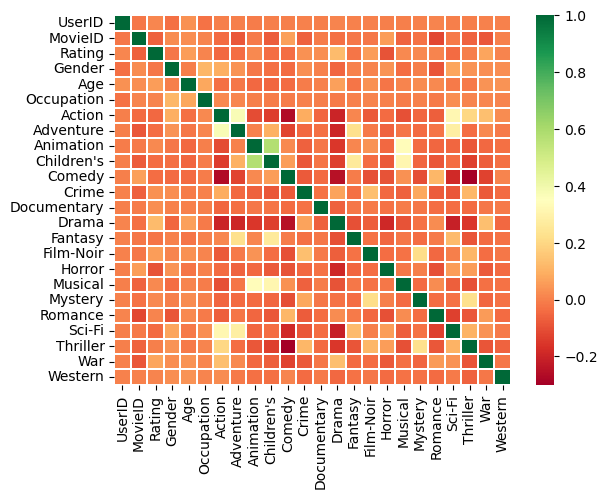

In [32]:
sns.heatmap(Correl_Matrix, xticklabels=True, yticklabels=True, annot= False, linewidths=0.05, cmap='RdYlGn')

In [33]:
# Setting threshold of abs(0.8)
threshold = 0.8

In [34]:
from collections import defaultdict

df_Master_Data_New_corr = df_Master_Data_New.corr()

flag = False

corr_dict = defaultdict(list)

for row in df_Master_Data_New_corr.index:
    for col in df_Master_Data_New_corr.columns:
        if (col!=row) and (abs(df_Master_Data_New_corr.loc[row,col]) >= threshold):
            flag = True
            corr_dict[row].append(col)

if flag:
    print('High Correlation Present !')
    print(corr_dict)
else:
    print('No High Correlation Present !')

No High Correlation Present !


### No pairs with correlation above 0.8
### Looking at Variance Inflation Factor

In [35]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_Master_Data_New_Rating = df_Master_Data_New.drop(['Rating'], axis=1)

for i, k in enumerate(df_Master_Data_New_Rating.columns):
    print(i+1,'. ', k,': ', round(variance_inflation_factor(df_Master_Data_New_Rating.values, i),2), sep='')

1. UserID: 3.58
2. MovieID: 3.53
3. Gender: 3.74
4. Age: 5.92
5. Occupation: 2.49
6. Action: 2.01
7. Adventure: 1.53
8. Animation: 1.71
9. Children's: 1.91
10. Comedy: 2.01
11. Crime: 1.18
12. Documentary: 1.03
13. Drama: 2.06
14. Fantasy: 1.23
15. Film-Noir: 1.14
16. Horror: 1.2
17. Musical: 1.23
18. Mystery: 1.16
19. Romance: 1.24
20. Sci-Fi: 1.47
21. Thriller: 1.55
22. War: 1.18
23. Western: 1.05


# Develop an appropriate model to predict the movie ratings

In [36]:
# Seperate the dataset into features and target variables
X = df_Master_Data_New.drop(columns='Rating', axis=1)
y = df_Master_Data_New['Rating']

In [37]:
# Use sci-kit learn to split train and test dataset ~  70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Train Dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test Dataset: {0}{1}".format(X_test.shape, y_test.shape))


Train Dataset: (700146, 23)(700146,)
Test Dataset: (300063, 23)(300063,)


In [38]:
X_train.head()

,UserID,MovieID,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
539061,1501,1220,1,25,11,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6514,1625,1197,1,45,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
623156,3411,2722,1,18,4,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
77441,4156,3578,1,56,20,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559047,5048,3448,0,35,7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Feature Scaling

# Create an instance of StandardScaler()
sc= StandardScaler()

scale_cols = X_train.columns

# fit on training data and apply it to every feature set present
X_train[scale_cols] = sc.fit_transform(X_train[scale_cols])
X_test[scale_cols] = sc.transform(X_test[scale_cols])


In [40]:
# Explore scaled features training dataset
X_train.head()

,UserID,MovieID,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
539061,-0.881724,-0.589387,0.571671,-0.402968,0.453513,1.699397,-0.392950,-0.212717,-0.279573,1.342543,...,-0.194732,-0.13617,-0.287188,4.807342,-0.20461,-0.416424,-0.431807,-0.483316,-0.271348,-0.14508
6514,-0.809989,-0.610372,0.571671,1.299451,-1.230329,1.699397,2.544853,-0.212717,-0.279573,1.342543,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,2.401400,-0.431807,-0.483316,-0.271348,-0.14508
623156,0.223225,0.781047,0.571671,-0.998814,-0.618022,1.699397,-0.392950,-0.212717,-0.279573,-0.744855,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,-0.416424,2.315852,2.069041,-0.271348,-0.14508
77441,0.654213,1.562067,0.571671,2.235781,1.831202,1.699397,-0.392950,-0.212717,-0.279573,-0.744855,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,-0.416424,-0.431807,-0.483316,-0.271348,-0.14508
559047,1.170242,1.443454,-1.749257,0.448241,-0.158793,-0.588444,-0.392950,-0.212717,-0.279573,1.342543,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,-0.416424,-0.431807,-0.483316,3.685311,-0.14508


# Logistic Regression Model training, Iteration & Validation

In [41]:
# create instance of LogisticRegression()
lr = LogisticRegression()

In [42]:
# Fit model on training datasets
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
#Computing prediction on 'X-test' test dataset, outputs predicted labels
y_pred = lr.predict(X_test)

In [44]:
#Evaluating model on accuracy metric with 'accuracy_score()' method
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.3520394050582711


In [45]:
# Test predicted output value of model for first row example in the test dataset
# test dataset row 0 with output values rescaled

X_test.loc[[0]]

,UserID,MovieID,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-1.749485,-0.614022,-1.749257,-2.44587,0.300437,-0.588444,-0.39295,-0.212717,-0.279573,-0.744855,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,-0.416424,-0.431807,-0.483316,-0.271348,-0.14508


In [46]:
print("Test dataset row 0: Actual Value: {}".format(y_test.values[0]))
print("Test dataset row 0: Predicted Output by the Model: {}".format(y_pred[0]))

Test dataset row 0: Actual Value: 3
Test dataset row 0: Predicted Output by the Model: 4


In [47]:
import statsmodels.formula.api as sm
import statsmodels.api as sm_api

X_train = sm_api.add_constant(X_train)
X_train.head()

,const,UserID,MovieID,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
539061,1.0,-0.881724,-0.589387,0.571671,-0.402968,0.453513,1.699397,-0.392950,-0.212717,-0.279573,...,-0.194732,-0.13617,-0.287188,4.807342,-0.20461,-0.416424,-0.431807,-0.483316,-0.271348,-0.14508
6514,1.0,-0.809989,-0.610372,0.571671,1.299451,-1.230329,1.699397,2.544853,-0.212717,-0.279573,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,2.401400,-0.431807,-0.483316,-0.271348,-0.14508
623156,1.0,0.223225,0.781047,0.571671,-0.998814,-0.618022,1.699397,-0.392950,-0.212717,-0.279573,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,-0.416424,2.315852,2.069041,-0.271348,-0.14508
77441,1.0,0.654213,1.562067,0.571671,2.235781,1.831202,1.699397,-0.392950,-0.212717,-0.279573,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,-0.416424,-0.431807,-0.483316,-0.271348,-0.14508
559047,1.0,1.170242,1.443454,-1.749257,0.448241,-0.158793,-0.588444,-0.392950,-0.212717,-0.279573,...,-0.194732,-0.13617,-0.287188,-0.208015,-0.20461,-0.416424,-0.431807,-0.483316,3.685311,-0.14508


In [48]:
X_test = sm_api.add_constant(X_test)

In [49]:
y_train_probs = [float(rating) / 5 for rating in y_train]

model = sm_api.Logit(y_train_probs, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.526567
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               700146
Model:                          Logit   Df Residuals:                   700122
Method:                           MLE   Df Model:                           23
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 -0.3330
Time:                        13:00:03   Log-Likelihood:            -3.6867e+05
converged:                       True   LL-Null:                   -2.7658e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9373      0.003    349.946      0.000       0.932       0.943
UserID          0.0099      0.003      3.689      0.000       0.005       0.015
MovieID        -0.0609      0.003    -22.157      0.000      -0.066      -0.056
Gender         -0.0142      0.003     -5.216      0.000      -0.020      -0.009
Age             0.0477      0.003     17.590      0.000       0.042       0.053
Occupation      0.0071      0.003      2.635      0.008       0.002       0.012
Action         -0.0429      0.003    -12.951      0.000      -0.049      -0.036
Adventure       0.0002      0.003      0.063      0.949      -0.006       0.006
Animation       0.0754      0.003     21.786      0.000       0.069       0.082
Children's     -0.0856      0.003    -24.676      0.000      -0.092      -0.079
Comedy         -0.0055      0.003     -1.640      0.101      -0.012       0.001
Crime           0.0221      0.003      7.748      0.000       0.017       0.028
Documentary     0.0378      0.003     12.674      0.000       0.032       0.044
Drama           0.1092      0.003     31.742      0.000       0.102       0.116
Fantasy         0.0132      0.003      4.637      0.000       0.008       0.019
Film-Noir       0.0664      0.003     20.610      0.000       0.060       0.073
Horror         -0.0690      0.003    -25.249      0.000      -0.074      -0.064
Musical         0.0265      0.003      9.011      0.000       0.021       0.032
Mystery         0.0003      0.003      0.103      0.918      -0.005       0.006
Romance        -0.0122      0.003     -4.327      0.000      -0.018      -0.007
Sci-Fi         -0.0119      0.003     -4.044      0.000      -0.018      -0.006
Thriller        0.0178      0.003      5.736      0.000       0.012       0.024
War             0.0748      0.003     24.952      0.000       0.069       0.081
Western         0.0138      0.003      5.046      0.000       0.008       0.019
===============================================================================
"""

In [50]:
# Predicted values
y_pred_orig = model.predict(params=result.params)
y_pred_orig

array([0.7092602 , 0.68922851, 0.66251345, ..., 0.70045956, 0.6771519 ,
       0.69676561])

# Model Iteration 1

In [51]:
#Deleting variables with high p-value
p_values = pd.DataFrame(result.pvalues).reset_index()
p_values = p_values.rename(columns={'index': 'Features', 0: 'p-value'})

# What features have p-values greater than 0.05 - remove them
alpha = 0.05

# Create a list of dropped columns from p-value
drop_cols_pval = list(p_values[p_values['p-value'] > alpha]['Features'])

dropped = drop_cols_pval

if(len(dropped)!=0):
    print("Dropping: {}".format(dropped))
else:
    print("No Dropping!")

Dropping: ['Adventure', 'Comedy', 'Mystery']


In [52]:
# Drop them
X_train2 = X_train.drop(columns=drop_cols_pval, axis=1)
X_test2 = X_test.drop(columns=drop_cols_pval, axis=1)

In [53]:
X_train2.shape

(700146, 21)

In [54]:
X_test2.shape

(300063, 21)

# Model iteration 2

In [55]:
import statsmodels.api as sm

y_train_probs = [float(rating) / 5 for rating in y_train]

model2 = sm.Logit(y_train_probs, X_train2)
result2 = model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.526567
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               700146
Model:                          Logit   Df Residuals:                   700125
Method:                           MLE   Df Model:                           20
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 -0.3330
Time:                        13:00:07   Log-Likelihood:            -3.6867e+05
converged:                       True   LL-Null:                   -2.7658e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9373      0.003    349.945      0.000       0.932       0.943
UserID          0.0099      0.003      3.692      0.000       0.005       0.015
MovieID        -0.0610      0.003    -22.275      0.000      -0.066      -0.056
Gender         -0.0142      0.003     -5.200      0.000      -0.020      -0.009
Age             0.0479      0.003     17.676      0.000       0.043       0.053
Occupation      0.0071      0.003      2.626      0.009       0.002       0.012
Action         -0.0413      0.003    -13.736      0.000      -0.047      -0.035
Animation       0.0759      0.003     22.073      0.000       0.069       0.083
Children's     -0.0854      0.003    -24.737      0.000      -0.092      -0.079
Crime           0.0222      0.003      7.794      0.000       0.017       0.028
Documentary     0.0384      0.003     13.004      0.000       0.033       0.044
Drama           0.1117      0.003     36.657      0.000       0.106       0.118
Fantasy         0.0136      0.003      4.860      0.000       0.008       0.019
Film-Noir       0.0672      0.003     21.276      0.000       0.061       0.073
Horror         -0.0679      0.003    -25.698      0.000      -0.073      -0.063
Musical         0.0268      0.003      9.126      0.000       0.021       0.033
Romance        -0.0123      0.003     -4.387      0.000      -0.018      -0.007
Sci-Fi         -0.0110      0.003     -3.843      0.000      -0.017      -0.005
Thriller        0.0195      0.003      6.862      0.000       0.014       0.025
War             0.0752      0.003     25.239      0.000       0.069       0.081
Western         0.0140      0.003      5.144      0.000       0.009       0.019
===============================================================================
"""

In [56]:
#Deleting p-value high variables
p_values2 = pd.DataFrame(result2.pvalues).reset_index()
p_values2 = p_values2.rename(columns={'index': 'Features', 0: 'p-value'})

# What features have p-values greater than 0.05 - remove them
alpha = 0.05

# Create a list of dropped columns from p-value
drop_cols_pval2 = list(p_values2[p_values2['p-value'] > alpha]['Features'])

dropped2 = drop_cols_pval2

if(len(dropped2)!=0):
    print("Dropping: {}".format(dropped2))
else:
    print("No Dropping!")

No Dropping!


# Model Statistics 2

In [57]:
# Predicted values
y_pred2 = model2.predict(params=result2.params)
y_pred2

array([0.71083884, 0.69043522, 0.66283433, ..., 0.70015178, 0.67608783,
       0.69723063])

# Final Model

In [58]:
y_train_probs = [float(rating) / 5 for rating in y_train]

model2 = sm.Logit(y_train_probs, X_train2)
result2 = model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.526567
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               700146
Model:                          Logit   Df Residuals:                   700125
Method:                           MLE   Df Model:                           20
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 -0.3330
Time:                        13:00:11   Log-Likelihood:            -3.6867e+05
converged:                       True   LL-Null:                   -2.7658e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9373      0.003    349.945      0.000       0.932       0.943
UserID          0.0099      0.003      3.692      0.000       0.005       0.015
MovieID        -0.0610      0.003    -22.275      0.000      -0.066      -0.056
Gender         -0.0142      0.003     -5.200      0.000      -0.020      -0.009
Age             0.0479      0.003     17.676      0.000       0.043       0.053
Occupation      0.0071      0.003      2.626      0.009       0.002       0.012
Action         -0.0413      0.003    -13.736      0.000      -0.047      -0.035
Animation       0.0759      0.003     22.073      0.000       0.069       0.083
Children's     -0.0854      0.003    -24.737      0.000      -0.092      -0.079
Crime           0.0222      0.003      7.794      0.000       0.017       0.028
Documentary     0.0384      0.003     13.004      0.000       0.033       0.044
Drama           0.1117      0.003     36.657      0.000       0.106       0.118
Fantasy         0.0136      0.003      4.860      0.000       0.008       0.019
Film-Noir       0.0672      0.003     21.276      0.000       0.061       0.073
Horror         -0.0679      0.003    -25.698      0.000      -0.073      -0.063
Musical         0.0268      0.003      9.126      0.000       0.021       0.033
Romance        -0.0123      0.003     -4.387      0.000      -0.018      -0.007
Sci-Fi         -0.0110      0.003     -3.843      0.000      -0.017      -0.005
Thriller        0.0195      0.003      6.862      0.000       0.014       0.025
War             0.0752      0.003     25.239      0.000       0.069       0.081
Western         0.0140      0.003      5.144      0.000       0.009       0.019
===============================================================================
"""

In [59]:
# Predicted Probability Values
y_pred_final = model2.predict(params=result2.params, exog=X_test2)
y_pred_final

array([0.77541608, 0.72556935, 0.68981126, ..., 0.71592725, 0.78577954,
       0.79045549])

In [60]:
# Default (Random) Model threshold of 0.5
y_pred_labels = (y_pred_final>0.5).astype(int)
y_pred_labels

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
# Computing Various Evaluation Metrics - Scikit-learn

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_labels))

Confusion Matrix
[[ 17076      0      0      0      0]
 [ 32037      0      0      0      0]
 [ 78059      0      0      0      0]
 [104915      0      0      0      0]
 [ 67976      0      0      0      0]]


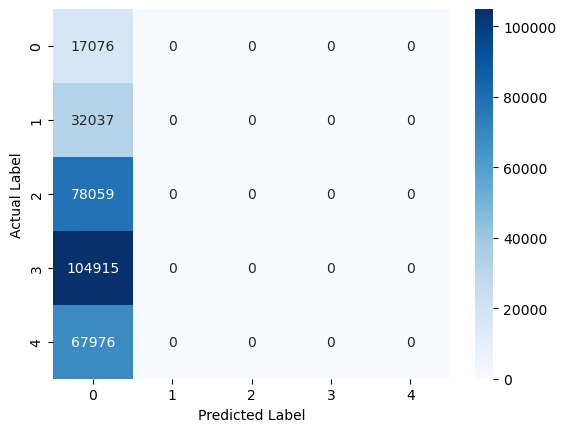

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual Label')
_ = plt.xlabel('Predicted Label')

In [63]:
# % of FP and FN in output
conf_mat = confusion_matrix(y_test, y_pred_labels)
print("% of False Positive: {}".format(conf_mat[0][1]*100/(conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1])))

print("% of False Negative: {}".format(conf_mat[1][0]*100/(conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1])))

% of False Positive: 0.0
% of False Negative: 65.23120151487386


In [64]:
y_pred_labels2 = (y_pred_final>0.3).astype(int)
y_pred_labels2

array([1, 1, 1, ..., 1, 1, 1])

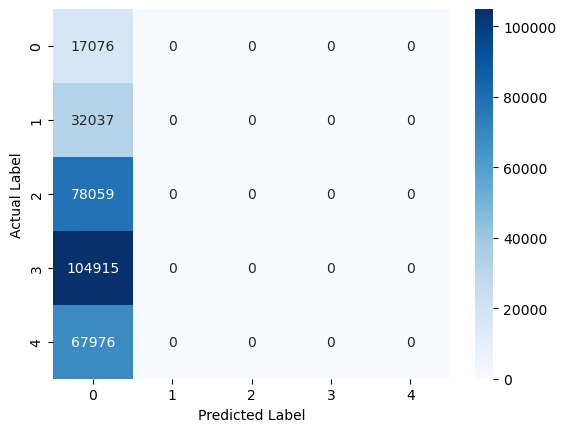

In [65]:
sns.heatmap(confusion_matrix(y_test, y_pred_labels2), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual Label')
_ = plt.xlabel('Predicted Label')

In [66]:
# % of FP and FN in output
conf_mat2 = confusion_matrix(y_test, y_pred_labels2)
print("% of False Positive: {}".format(conf_mat2[0][1]*100/(conf_mat2[0][0] + conf_mat2[0][1] + conf_mat2[1][0] + conf_mat2[1][1])))

print("% of False Negative: {}".format(conf_mat2[1][0]*100/(conf_mat2[0][0] + conf_mat2[0][1] + conf_mat2[1][0] + conf_mat2[1][1])))

% of False Positive: 0.0
% of False Negative: 65.23120151487386


In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_final, y_test) 
rmse = np.sqrt(mse)

print("About 95% of the predictions are between -" + str(np.round(2*rmse,2)) + " and " + str(np.round(2*rmse, 2)) 
     + " of actual rating values")

About 95% of the predictions are between -6.15 and 6.15 of actual rating values


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Generate Precision for the model
print(precision_score(y_test, y_pred, average='weighted'))

# Generate Recall of the model 
print(recall_score(y_test, y_pred, average='weighted'))

0.2906953397053388
0.3520394050582711


In [69]:
confusion_matrix(y_test, y_pred)

array([[    0,     0,  1995, 14838,   243],
       [    0,     0,  2704, 28655,   678],
       [    0,     0,  4980, 70828,  2251],
       [    2,     0,  4821, 95488,  4604],
       [    0,     0,  2386, 60424,  5166]], dtype=int64)